### Dictionary sum

Write a function that accepts a dictionary and threshold value.  The function should sum all of the dictionary values who's keys are greater than or equal to the threshold.  The dictionary will have both numeric keys and values (ie `{1: 2, 3: 4, 5: 6}`).

Example

```python
d = {1: 2, 3: 4, 5: 6}

your_function(d, 3)
# Expected output is 10.
# The keys 3 & 5 are greater than or equal to the threshold of 3.
# The values corresponding to the keys 3 & 5 are 4 & 6, and 4 + 6 = 10.
```

In [6]:
'''
Function SumDic
Returns an integer representing the sum of all of the values in a dictionary that are greater than or equal to the given threshold

Parameters:
d is a dictionary with integer key and value pairs.
num is the threshold, the minimum number of keys. 
'''
def SumDic(d, num):
  newDict = dict(filter(lambda elem: elem[0] >= num, d.items()))
  return sum(newDict.values())


threshold = 3
dictionary =  {1: 2, 3: 4, 5: 6, 19: 36, 0: 5}
print("The sum of all keys greater than", threshold, "in your dictionary is", SumDic(dictionary, threshold) )

The sum of all keys greater than 3 in your dictionary is 46


### Pandas practice

> ##### Description
> The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).
>
> ##### Columns
A data frame with 32 observations on 11 (numeric) variables.
>
> ```
>  1. mpg    Miles/(US) gallon
>  2. cyl    Number of cylinders
>  3. disp   Displacement (cu.in.)
>  4. hp     Gross horsepower
>  5. drat   Rear axle ratio
>  6. wt     Weight (1000 lbs)
>  7. qsec   1/4 mile time
>  8. vs     Engine (0 = V-shaped, 1 = straight)
>  9. am     Transmission (0 = automatic, 1 = manual)
> 10. gear   Number of forward gears
> 11. carb   Number of carburetors
> ```

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mtcars_url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv'

Read the data frame using `mtcars_url`

In [11]:
df_mtCars = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')


Print the first 8 rows of the dataframe.

In [13]:
df_mtCars.head(8)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


Rename the first column to something more meaningful.

In [40]:
df_mtCars = df_mtCars.rename(columns={"0": "model"})

Plot the distribution of the `cyl` column.  Is this a continuous or discrete variable?

The number of cylinders in a vehicle is determined by counting. Therefore; it is discrete. 

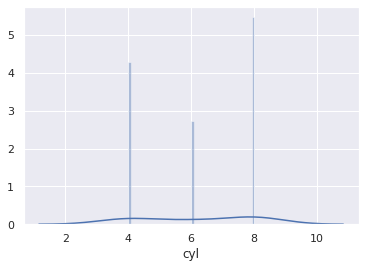

In [25]:
import seaborn as sns
sns.set()

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

ax = sns.distplot(df_mtCars['cyl'], bins = 50)
plt.show()

What is the minimum value in the `mpg` column?

In [41]:
print("The minimum value in the mpg column is", df_mtCars['mpg'].min())

The minimum value in the mpg column is 10.4


What is the name of the car with `mpg` equal to `15.0`?

In [50]:
print("The name of the vehicle with mpg equal to 15.0 is the", df_mtCars.query("mpg == 15.0")['model'].to_string(index=False))

The name of the vehicle with mpg equal to 15.0 is the  Maserati Bora


What is the name of the car that has the best gas mileage?

In [54]:
print("The name of the car with the best gas mileage is", df_mtCars[df_mtCars.mpg == df_mtCars.mpg.max()]['model'].to_string(index=False))

The name of the car with the best gas mileage is  Toyota Corolla


**Use your intuition from the variable descriptions and visulaizations to find 2 variables that appear to be *positively* correlated.**

There appears to be a positive correlation between the number of cylinders and the horsepower of a vehicle. 

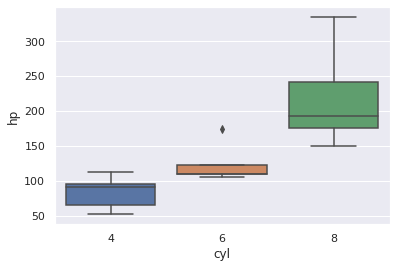

In [68]:
sns.boxplot(x="cyl", y="hp", data=df_mtCars);

In [69]:
relCheck = df_mtCars[['cyl', 'hp']]
relCheck['cyl'].corr(relCheck['hp'])

0.8324474527218194

**Use your intuition from the variable descriptions and visulaizations to find 2 variables that appear to be *negatively* correlated.**

According to the box plots, descriptions, and a brief look at the data - it appears that there is a negative correlation between the miles per gallon and the number of cylinders in a vehicle. 

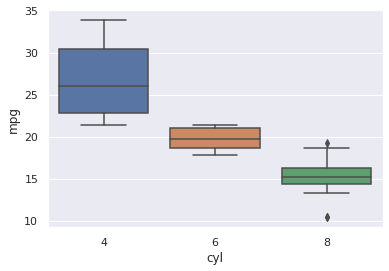

In [71]:

#Use a boxplot to illustrate how overallcond affects the sale price. Highlight the difference between having central air conditioning or not.
sns.boxplot(x="cyl", y="mpg", data=df_mtCars);

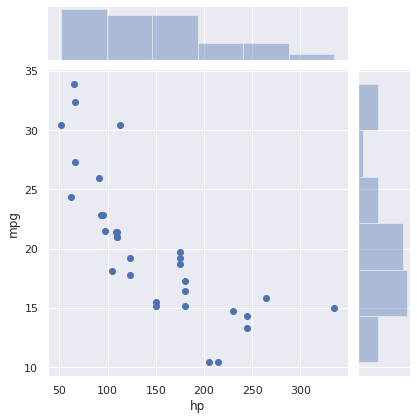

In [77]:
sns.jointplot(x="hp", y="mpg", data=df_mtCars);

In [76]:
df_mtCars[['mpg','cyl','gear', 'am', 'carb', 'drat',	'wt',	'qsec',	'vs']].describe()


,mpg,cyl,gear,am,carb,drat,wt,qsec,vs
count,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.187500,3.687500,0.406250,2.8125,3.596563,3.217250,17.848750,0.437500
std,6.026948,1.785922,0.737804,0.498991,1.6152,0.534679,0.978457,1.786943,0.504016
min,10.400000,4.000000,3.000000,0.000000,1.0000,2.760000,1.513000,14.500000,0.000000
25%,15.425000,4.000000,3.000000,0.000000,2.0000,3.080000,2.581250,16.892500,0.000000
50%,19.200000,6.000000,4.000000,0.000000,2.0000,3.695000,3.325000,17.710000,0.000000
75%,22.800000,8.000000,4.000000,1.000000,4.0000,3.920000,3.610000,18.900000,1.000000
max,33.900000,8.000000,5.000000,1.000000,8.0000,4.930000,5.424000,22.900000,1.000000


In [75]:
relCheck = df_mtCars[['cyl', 'mpg']]
relCheck['cyl'].corr(relCheck['mpg'])

-0.8521619594266132